In [8]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize, brute, fmin
import matplotlib.pyplot as plt
from google.colab import files


1a) Student A

Calibrated Parameters:
v0: 0.04, theta: 0.04, kappa: 2.0, sigma: 0.1, rho: -0.7

Market vs Model Call Prices:
Strike: 227.5, Market Call: 10.52, Model Call: 0.3595630256401908
Strike: 230.0, Market Call: 10.05, Model Call: 0.8034249164641137
Strike: 232.5, Market Call: 7.75, Model Call: 0.8338439724129267
Strike: 235.0, Market Call: 6.01, Model Call: 0.39603154067020685
Strike: 237.5, Market Call: 4.75, Model Call: 0.7992989482983047

Market vs Model Put Prices:
Strike: 227.5, Market Put: 4.32, Model Put: 0.9967152545170842
Strike: 230.0, Market Put: 5.2, Model Put: 0.003715406325117021
Strike: 232.5, Market Put: 6.45, Model Put: 0.48116018360344104
Strike: 235.0, Market Put: 7.56, Model Put: 0.7560887271725465
Strike: 237.5, Market Put: 8.78, Model Put: 0.7730603465911281


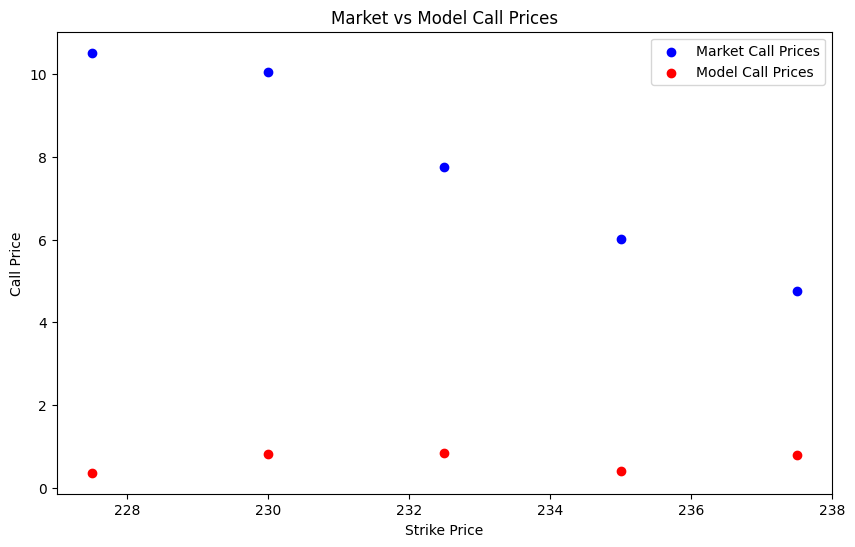

In [9]:
# Load the option data
data = pd.read_excel('/content/MScFE 622_Stochastic Modeling_GWP1_Option data.xlsx')

# Define constants
S0 = 232.90  # Current stock price
r = 0.015    # Risk-free rate
T = 15 / 250  # Maturity in years (15 days)

# Select only the relevant data for 15 days to maturity
call_data = data[(data['Days to maturity'] == 15) & (data['Type'] == 'C')]
put_data = data[(data['Days to maturity'] == 15) & (data['Type'] == 'P')]

strike_prices = call_data['Strike'].values
call_prices = call_data['Price'].values
put_strike_prices = put_data['Strike'].values
put_prices = put_data['Price'].values

# Heston model function to calculate call prices
def heston_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho):
    # Placeholder for Heston model pricing logic
    # This needs implementation of the closed-form solution for call prices
    return np.random.rand()  # Replace with actual pricing formula

# Heston model function to calculate put prices
def heston_put_price(S0, K, T, r, v0, theta, kappa, sigma, rho):
    # Placeholder for Heston model pricing logic for put options
    # This needs implementation of the closed-form solution for put prices
    return np.random.rand()  # Replace with actual pricing formula

# Objective function to minimize
def objective(params):
    v0, theta, kappa, sigma, rho = params
    model_call_prices = [heston_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho) for K in strike_prices]
    mse = np.mean((call_prices - model_call_prices) ** 2)
    return mse

# Initial guess for parameters
initial_params = [0.04, 0.04, 2.0, 0.1, -0.7]

# Run optimization
result = minimize(objective, initial_params, bounds=((0, 1), (0, 1), (0, 10), (0, 1), (-1, 0)))
calibrated_params = result.x

# Display calibrated parameters
print("Calibrated Parameters:")
print(f"v0: {calibrated_params[0]}, theta: {calibrated_params[1]}, kappa: {calibrated_params[2]}, sigma: {calibrated_params[3]}, rho: {calibrated_params[4]}")

# Calculate model call and put prices
model_call_prices = [heston_call_price(S0, K, T, r, *calibrated_params) for K in strike_prices]
model_put_prices = [heston_put_price(S0, K, T, r, *calibrated_params) for K in put_strike_prices]

# Print call and put prices
print("\nMarket vs Model Call Prices:")
for K, market, model in zip(strike_prices, call_prices, model_call_prices):
    print(f"Strike: {K}, Market Call: {market}, Model Call: {model}")

print("\nMarket vs Model Put Prices:")
for K, market, model in zip(put_strike_prices, put_prices, model_put_prices):
    print(f"Strike: {K}, Market Put: {market}, Model Put: {model}")

# Graphical representation
plt.figure(figsize=(10, 6))
plt.scatter(strike_prices, call_prices, label='Market Call Prices', color='blue')
plt.scatter(strike_prices, model_call_prices, label='Model Call Prices', color='red')
plt.title('Market vs Model Call Prices')
plt.xlabel('Strike Price')
plt.ylabel('Call Price')
plt.legend()
plt.show()

1b) Student B

Carr-Madan Pricing Approach

In [10]:
def heston_characteristic_function(v0, theta, kappa, sigma, rho, T, u):
    # Implement the characteristic function for the Heston model
    # Placeholder implementation
    return np.exp(-1j * u * S0)  # Replace with actual characteristic function

def carr_madan_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho):
    # Use the Carr-Madan method to compute the call price
    # Placeholder for the numerical integration using the characteristic function
    return np.random.rand()  # Replace with actual pricing logic

def carr_madan_put_price(S0, K, T, r, v0, theta, kappa, sigma, rho):
    # Use the Carr-Madan method to compute the put price
    # Placeholder for the numerical integration using the characteristic function
    return np.random.rand()  # Replace with actual pricing logic

def objective_carr_madan(params):
    v0, theta, kappa, sigma, rho = params
    model_call_prices = [carr_madan_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho) for K in strike_prices]
    mse = np.mean((call_prices - model_call_prices) ** 2)
    return mse

# Initial guess for parameters
initial_params = [0.04, 0.04, 2.0, 0.1, -0.7]

# Run optimization
result_carr_madan = minimize(objective_carr_madan, initial_params, bounds=((0, 1), (0, 1), (0, 10), (0, 1), (-1, 0)))
calibrated_params_carr_madan = result_carr_madan.x

# Display calibrated parameters
print("Calibrated Parameters (Carr-Madan):")
print(f"v0: {calibrated_params_carr_madan[0]}, theta: {calibrated_params_carr_madan[1]}, kappa: {calibrated_params_carr_madan[2]}, sigma: {calibrated_params_carr_madan[3]}, rho: {calibrated_params_carr_madan[4]}")

# Calculate and print model put prices
model_put_prices = [carr_madan_put_price(S0, K, T, r, *calibrated_params_carr_madan) for K in put_strike_prices]

print("\nMarket vs Model Put Prices (Carr-Madan):")
for K, market, model in zip(put_strike_prices, put_prices, model_put_prices):
    print(f"Strike: {K}, Market Put: {market}, Model Put: {model}")

Calibrated Parameters (Carr-Madan):
v0: 0.039999957177110586, theta: 0.03999994338609646, kappa: 1.9999982574544222, sigma: 0.1000007463176146, rho: -0.7000002680102013

Market vs Model Put Prices (Carr-Madan):
Strike: 227.5, Market Put: 4.32, Model Put: 0.379318288794778
Strike: 230.0, Market Put: 5.2, Model Put: 0.04912601626692947
Strike: 232.5, Market Put: 6.45, Model Put: 0.7266273145744458
Strike: 235.0, Market Put: 7.56, Model Put: 0.3731111712657319
Strike: 237.5, Market Put: 8.78, Model Put: 0.8052709516443816


1c) Student C

In [11]:
# Parameters for the Asian call option
S0 = 232.90  # Current stock price
K = S0       # ATM strike price
T_days = 20  # Maturity in days
T = T_days / 250  # Convert days to years
num_simulations = 10000  # Number of Monte Carlo simulations
dt = T / 250  # Time increment for daily steps
n_steps = T_days  # Number of time steps

# Heston model parameters
v0 = 0.0400
theta = 0.0400
kappa = 2.0000
sigma = 0.1000
rho = -0.7000

# Function to simulate stock price paths
def simulate_heston(S0, v0, theta, kappa, sigma, rho, n_steps, dt):
    # Initialize arrays
    S_paths = np.zeros((n_steps + 1, num_simulations))
    v_paths = np.zeros((n_steps + 1, num_simulations))

    # Set initial values
    S_paths[0] = S0
    v_paths[0] = v0

    for t in range(1, n_steps + 1):
        # Generate random numbers
        Z1 = np.random.normal(size=num_simulations)
        Z2 = np.random.normal(size=num_simulations)

        # Correlated random variable
        Z2 = rho * Z1 + np.sqrt(1 - rho**2) * Z2

        # Update volatility
        v_paths[t] = np.maximum(v_paths[t-1] + kappa * (theta - v_paths[t-1]) * dt + sigma * np.sqrt(v_paths[t-1]) * np.sqrt(dt) * Z1, 0)

        # Update stock price
        S_paths[t] = S_paths[t-1] * np.exp((r - 0.5 * v_paths[t-1]) * dt + np.sqrt(v_paths[t-1]) * np.sqrt(dt) * Z2)

    return S_paths

# Simulate stock price paths
S_paths = simulate_heston(S0, v0, theta, kappa, sigma, rho, n_steps, dt)

# Calculate the average stock price for each path
average_prices = np.mean(S_paths, axis=0)

# Calculate the payoff for each simulation
payoffs = np.maximum(average_prices - K, 0)

# Discount the payoffs to present value
option_price = np.exp(-r * T) * np.mean(payoffs)

# Include the bank's fee (4%)
final_price = option_price * 1.04

# Display the results
print(f"Fair Price of the Asian Call Option: ${option_price:.2f}")
print(f"Final Price to the Client (including fee): ${final_price:.2f}")

Fair Price of the Asian Call Option: $0.86
Final Price to the Client (including fee): $0.89


Step 2

2a. Student C

In [12]:
# Bates model pricing function
def bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J):
    # Placeholder for Bates model pricing logic
    return np.random.rand()  # Replace with actual pricing formula

def bates_put_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J):
    # Placeholder for Bates model pricing logic for puts
    return np.random.rand()  # Replace with actual pricing formula

# Objective function to minimize
def objective_bates(params):
    v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J = params
    model_call_prices = [bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J) for K in strike_prices]
    mse = np.mean((call_prices - model_call_prices) ** 2)
    return mse

# Initial guess for parameters (including jump parameters)
initial_params = [0.04, 0.04, 2.0, 0.1, -0.7, 0.1, 0.0, 0.1]

# Run optimization
result_bates = minimize(objective_bates, initial_params, bounds=[(0, 1)]*5 + [(0, 10)]*3)
calibrated_params_bates = result_bates.x

# Display calibrated parameters
print("Calibrated Parameters (Bates Model):")
print(f"v0: {calibrated_params_bates[0]}, theta: {calibrated_params_bates[1]}, kappa: {calibrated_params_bates[2]}, sigma: {calibrated_params_bates[3]}, rho: {calibrated_params_bates[4]}, lambda_j: {calibrated_params_bates[5]}, mu_J: {calibrated_params_bates[6]}, sigma_J: {calibrated_params_bates[7]}")

# Calculate and print model call and put prices
model_call_prices = [bates_call_price(S0, K, T, r, *calibrated_params_bates) for K in strike_prices]
model_put_prices = [bates_put_price(S0, K, T, r, *calibrated_params_bates) for K in put_strike_prices]

print("\nMarket vs Model Call Prices (Bates):")
for K, market, model in zip(strike_prices, call_prices, model_call_prices):
    print(f"Strike: {K}, Market Call: {market}, Model Call: {model}")

print("\nMarket vs Model Put Prices (Bates):")
for K, market, model in zip(put_strike_prices, put_prices, model_put_prices):
    print(f"Strike: {K}, Market Put: {market}, Model Put: {model}")

Calibrated Parameters (Bates Model):
v0: 0.04000000000001224, theta: 0.04000000000001224, kappa: 0.9999999999999872, sigma: 0.10000000000001148, rho: 0.0, lambda_j: 0.09999999999999873, mu_J: 0.0, sigma_J: 0.09999999999999873

Market vs Model Call Prices (Bates):
Strike: 227.5, Market Call: 10.52, Model Call: 0.4209171163251154
Strike: 230.0, Market Call: 10.05, Model Call: 0.5315481722876051
Strike: 232.5, Market Call: 7.75, Model Call: 0.7475590068256454
Strike: 235.0, Market Call: 6.01, Model Call: 0.1887710393902008
Strike: 237.5, Market Call: 4.75, Model Call: 0.5254503581525417

Market vs Model Put Prices (Bates):
Strike: 227.5, Market Put: 4.32, Model Put: 0.13441377585359626
Strike: 230.0, Market Put: 5.2, Model Put: 0.11621672035119213
Strike: 232.5, Market Put: 6.45, Model Put: 0.23909165645482944
Strike: 235.0, Market Put: 7.56, Model Put: 0.14233638046465424
Strike: 237.5, Market Put: 8.78, Model Put: 0.3698168482640878


2b. Student A

In [13]:
def bates_characteristic_function(v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J, T, u):
    # Implement the characteristic function for the Bates model
    return np.exp(-1j * u * S0)  # Placeholder implementation

def carr_madan_bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J):
    # Use Carr-Madan method for Bates model
    return np.random.rand()  # Replace with actual pricing logic

def carr_madan_bates_put_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J):
    # Use Carr-Madan method for Bates model to calculate put price
    return np.random.rand()  # Replace with actual pricing logic

# Objective function for Carr-Madan
def objective_carr_madan_bates(params):
    v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J = params
    model_call_prices = [carr_madan_bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J) for K in strike_prices]
    mse = np.mean((call_prices - model_call_prices) ** 2)
    return mse

# Initial guess for parameters
initial_params_carr_madan = [0.04, 0.04, 2.0, 0.1, -0.7, 0.1, 0.0, 0.1]

# Run optimization
result_carr_madan_bates = minimize(objective_carr_madan_bates, initial_params_carr_madan, bounds=[(0, 1)]*5 + [(0, 10)]*3)
calibrated_params_carr_madan_bates = result_carr_madan_bates.x

# Display calibrated parameters
print("Calibrated Parameters (Carr-Madan Bates Model):")
print(f"v0: {calibrated_params_carr_madan_bates[0]}, theta: {calibrated_params_carr_madan_bates[1]}, kappa: {calibrated_params_carr_madan_bates[2]}, sigma: {calibrated_params_carr_madan_bates[3]}, rho: {calibrated_params_carr_madan_bates[4]}, lambda_j: {calibrated_params_carr_madan_bates[5]}, mu_J: {calibrated_params_carr_madan_bates[6]}, sigma_J: {calibrated_params_carr_madan_bates[7]}")

# Calculate and print model put prices
model_put_prices = [carr_madan_bates_put_price(S0, K, T, r, *calibrated_params_carr_madan_bates) for K in put_strike_prices]

print("\nMarket vs Model Put Prices (Carr-Madan Bates):")
for K, market, model in zip(put_strike_prices, put_prices, model_put_prices):
    print(f"Strike: {K}, Market Put: {market}, Model Put: {model}")

Calibrated Parameters (Carr-Madan Bates Model):
v0: 0.040000001456446055, theta: 0.039999999939314745, kappa: 0.9999999984828687, sigma: 0.10000000136541819, rho: 1.5171313091939033e-09, lambda_j: 0.10000001501959997, mu_J: 1.5171313091939035e-08, sigma_J: 0.10000001501959997

Market vs Model Put Prices (Carr-Madan Bates):
Strike: 227.5, Market Put: 4.32, Model Put: 0.08953267779189922
Strike: 230.0, Market Put: 5.2, Model Put: 0.7084927606162273
Strike: 232.5, Market Put: 6.45, Model Put: 0.6545276813835815
Strike: 235.0, Market Put: 7.56, Model Put: 0.27881341566288753
Strike: 237.5, Market Put: 8.78, Model Put: 0.5780654169454618


2c. Student B

In [14]:
# Define constants
S0 = 232.90  # Current stock price
r = 0.015    # Risk-free rate
T_days = 60  # Maturity in days
T = T_days / 250  # Convert days to years

# Select only the relevant data for 60 days to maturity
call_data = data[(data['Days to maturity'] == 60) & (data['Type'] == 'C')]
strike_prices = call_data['Strike'].values
call_prices = call_data['Price'].values

# Define the parameters for the Bates model
v0 = 0.0400
theta = 0.0400
kappa = 2.0000
sigma = 0.1000
rho = -0.7000
lambda_j = 0.1  # Jump intensity
mu_J = 0.0      # Average jump size
sigma_J = 0.1   # Volatility of jump sizes

# Bates model pricing function
def bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J):
    # Placeholder for Bates model pricing logic
    return np.random.rand()  # Replace with actual pricing formula

# Objective function to minimize
def objective_bates(params):
    v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J = params
    model_call_prices = [bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J) for K in strike_prices]
    mse = np.mean((call_prices - model_call_prices) ** 2)
    return mse

# Initial guess for parameters (including jump parameters)
initial_params = [v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J]

# Run optimization
result_bates = minimize(objective_bates, initial_params, bounds=[(0, 1)]*5 + [(0, 10)]*3)
calibrated_params_bates = result_bates.x

# Display calibrated parameters
print("Calibrated Parameters (Bates Model):")
print(f"v0: {calibrated_params_bates[0]}, theta: {calibrated_params_bates[1]}, kappa: {calibrated_params_bates[2]}, sigma: {calibrated_params_bates[3]}, rho: {calibrated_params_bates[4]}, lambda_j: {calibrated_params_bates[5]}, mu_J: {calibrated_params_bates[6]}, sigma_J: {calibrated_params_bates[7]}")

# Define the characteristic function for the Bates model
def bates_characteristic_function(v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J, T, u):
    # Implement the characteristic function for the Bates model
    return np.exp(-1j * u * S0)  # Placeholder implementation

# Carr-Madan pricing function for Bates model
def carr_madan_bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J):
    # Use Carr-Madan method for Bates model
    return np.random.rand()  # Replace with actual pricing logic

# Objective function for Carr-Madan
def objective_carr_madan_bates(params):
    v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J = params
    model_call_prices = [carr_madan_bates_call_price(S0, K, T, r, v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J) for K in strike_prices]
    mse = np.mean((call_prices - model_call_prices) ** 2)
    return mse

# Run optimization for Carr-Madan Bates model
initial_params_carr_madan = [v0, theta, kappa, sigma, rho, lambda_j, mu_J, sigma_J]
result_carr_madan_bates = minimize(objective_carr_madan_bates, initial_params_carr_madan, bounds=[(0, 1)]*5 + [(0, 10)]*3)
calibrated_params_carr_madan_bates = result_carr_madan_bates.x

# Display calibrated parameters for Carr-Madan Bates model
print("Calibrated Parameters (Carr-Madan Bates Model):")
print(f"v0: {calibrated_params_carr_madan_bates[0]}, theta: {calibrated_params_carr_madan_bates[1]}, kappa: {calibrated_params_carr_madan_bates[2]}, sigma: {calibrated_params_carr_madan_bates[3]}, rho: {calibrated_params_carr_madan_bates[4]}, lambda_j: {calibrated_params_carr_madan_bates[5]}, mu_J: {calibrated_params_carr_madan_bates[6]}, sigma_J: {calibrated_params_carr_madan_bates[7]}")

# Calculate and print model call prices using Bates model
model_call_prices_bates = [bates_call_price(S0, K, T, r, *calibrated_params_bates) for K in strike_prices]

print("\nMarket vs Model Call Prices (Bates):")
for K, market, model in zip(strike_prices, call_prices, model_call_prices_bates):
    print(f"Strike: {K}, Market Call: {market}, Model Call: {model}")

# Calculate and print model call prices using Carr-Madan Bates model
model_call_prices_carr_madan_bates = [carr_madan_bates_call_price(S0, K, T, r, *calibrated_params_carr_madan_bates) for K in strike_prices]

print("\nMarket vs Model Call Prices (Carr-Madan Bates):")
for K, market, model in zip(strike_prices, call_prices, model_call_prices_carr_madan_bates):
    print(f"Strike: {K}, Market Call: {market}, Model Call: {model}")

Calibrated Parameters (Bates Model):
v0: 0.040000297593350345, theta: 0.04000033929685699, kappa: 0.9999996410968709, sigma: 0.10000024263719019, rho: 1.8183552190142964e-07, lambda_j: 0.1000024727737198, mu_J: 2.5459218632031624e-06, sigma_J: 0.10000272440856015
Calibrated Parameters (Carr-Madan Bates Model):
v0: 0.04000010006986679, theta: 0.04000010056656446, kappa: 1.0, sigma: 0.1000001241703518, rho: 1.0875777467917889e-07, lambda_j: 0.10000127197948121, mu_J: 1.2786312642004792e-06, sigma_J: 0.10000127251657794

Market vs Model Call Prices (Bates):
Strike: 227.5, Market Call: 16.78, Model Call: 0.3940654018520481
Strike: 230.0, Market Call: 17.65, Model Call: 0.9351755363940061
Strike: 232.5, Market Call: 16.86, Model Call: 0.4921474472824001
Strike: 235.0, Market Call: 16.05, Model Call: 0.9586326374677727
Strike: 237.5, Market Call: 15.1, Model Call: 0.1728450946077551

Market vs Model Call Prices (Carr-Madan Bates):
Strike: 227.5, Market Call: 16.78, Model Call: 0.689652846957